# Khipus.ai
## Unsupervised Learning
## Clustering Algorithms
## Case Study
<span>© Copyright Notice 2025, Khipus.ai - All Rights Reserved.</span>

### Introduction to Clustering Analysis
Clustering is an unsupervised machine learning technique used to group similar data points together. It helps in discovering patterns and structures in the data. In this case study, we will perform clustering analysis using the Wholesale Customers dataset.

### Dataset Overview
The dataset contains information on wholesale customer orders, including features such as:
- `Fresh`: Annual spending on fresh products.
- `Milk`: Annual spending on milk products.
- `Grocery`: Annual spending on grocery products.
- `Frozen`: Annual spending on frozen products.
- `Detergents_Paper`: Annual spending on detergents and paper products.
- `Delicassen`: Annual spending on delicatessen products.

In [1]:
# Load necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('Wholesale customers data.csv')

# Display the first few rows
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


### Data Preprocessing
Before performing clustering, it is essential to standardize the data to ensure all features contribute equally.

In [2]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.iloc[:, 2:])  # Exclude 'Channel' and 'Region'

# Verify the standardized data
scaled_data[:5]

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       [ 0.10011141, -0.62401993, -0.3929769 ,  0.6871443 , -0.49858822,
         0.09341105],
       [ 0.84023948, -0.05239645, -0.07935618,  0.17385884, -0.23191782,
         1.29934689]])

### Using the Elbow Method to Determine Optimal Clusters
The Elbow method is used to find the optimal number of clusters by plotting the within-cluster sum of squares (WCSS).

c:\Users\sanikj\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sanikj\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\sanikj\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sanikj\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

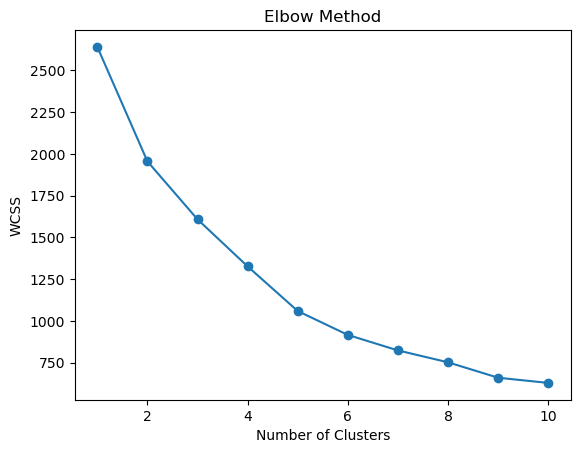

In [3]:
# Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### Clustering Analysis
Based on the Elbow method, choose the optimal number of clusters and perform clustering.

In [4]:
# Perform clustering with the optimal number of clusters
optimal_clusters = 3  # Replace with the number determined from the Elbow method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the original dataset
data['Cluster'] = clusters

# Display the dataset with cluster labels
data.head()

c:\Users\sanikj\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sanikj\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,0


### Visualizing the Clusters
Finally, visualize the clusters in a 2D space using two features.

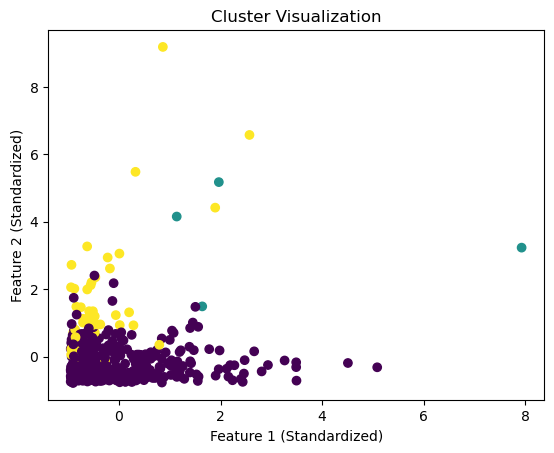

In [5]:
# Visualize the clusters
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clusters, cmap='viridis')
plt.title('Cluster Visualization')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.show()

c:\Users\sanikj\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sanikj\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sanikj\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sanikj\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

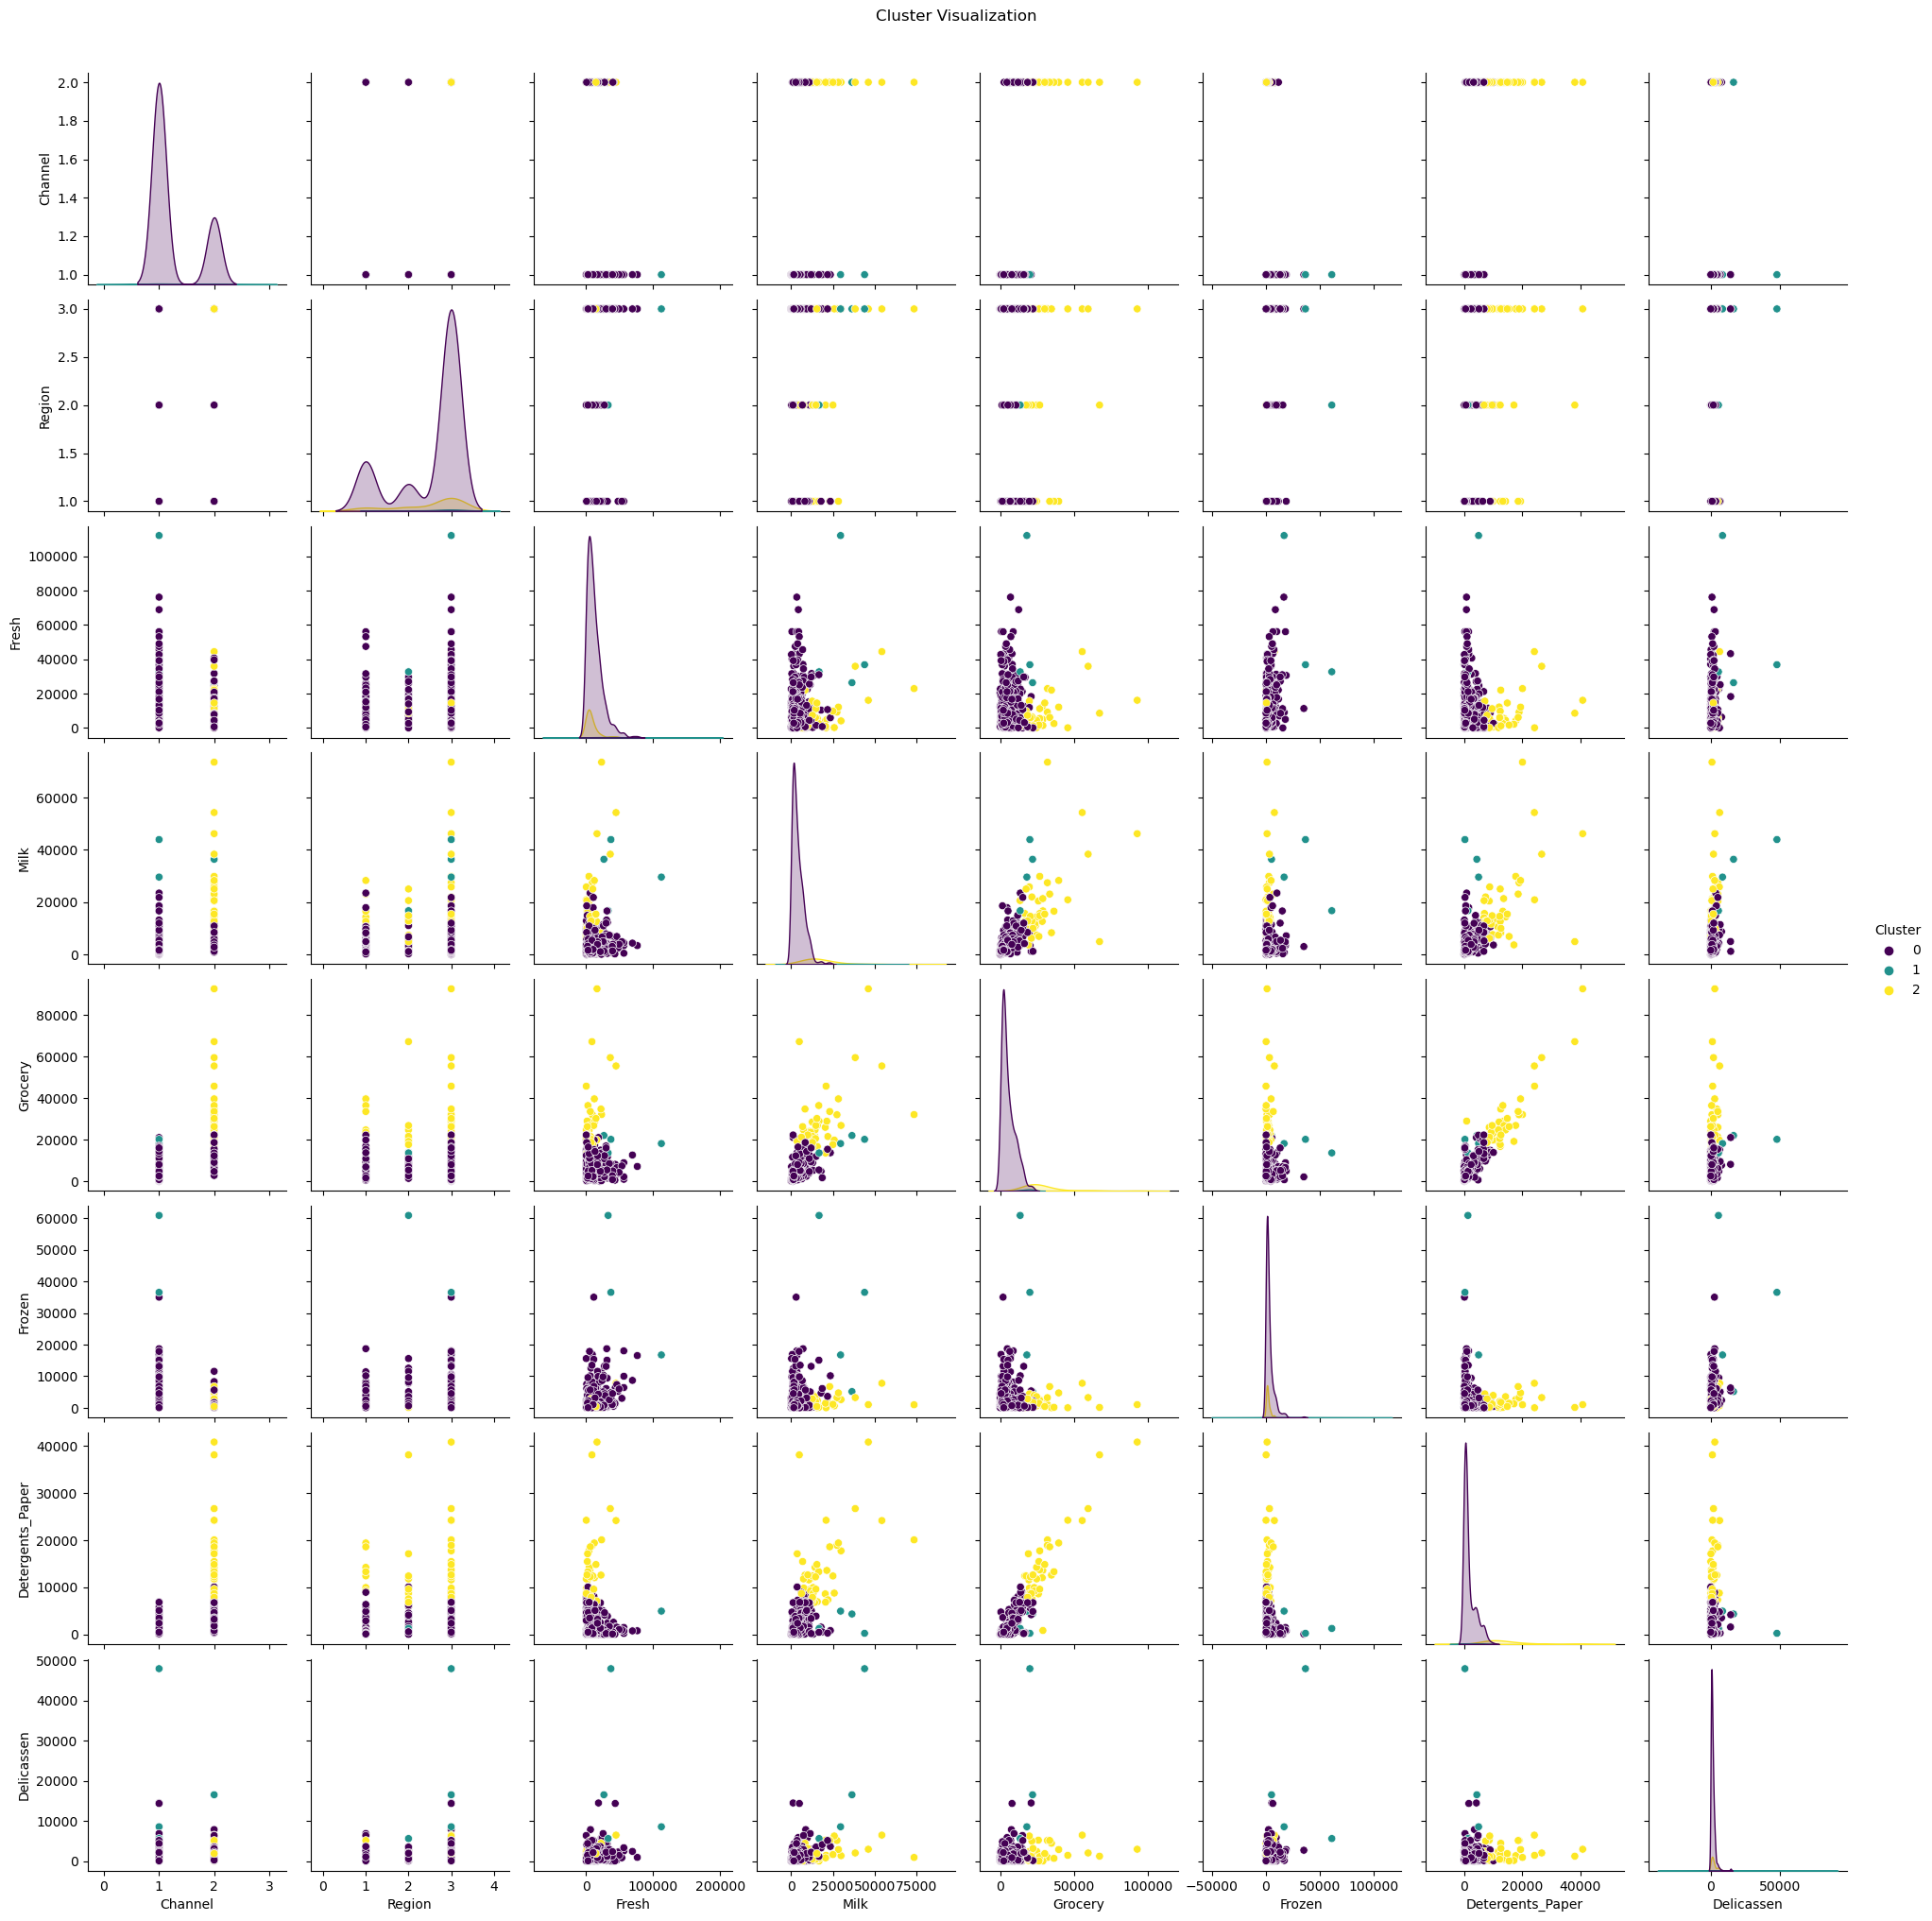

In [6]:
import seaborn as sns

# Create a pair plot to visualize the clusters
sns.pairplot(data, hue='Cluster', palette='viridis', diag_kind='kde')
plt.suptitle('Cluster Visualization', y=1.02)
plt.show()